# Kernel Density Estimation (KDE)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
import statsmodels.distributions.empirical_distribution as sde

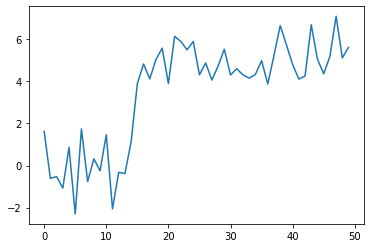

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(50)
plt.plot(x);

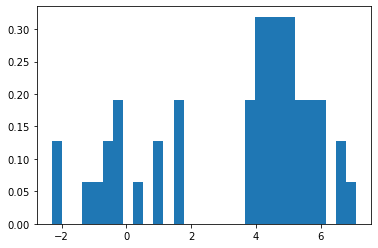

In [3]:
hist = plt.hist(x, bins=30, density=True)

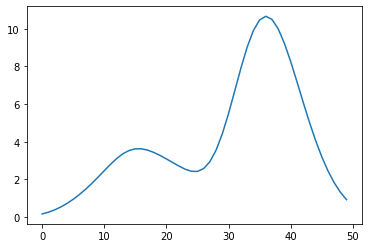

In [4]:
x_d = np.linspace(-4, 8, 50)
density = sum(ss.norm(xi).pdf(x_d) for xi in x)
plt.plot(density);

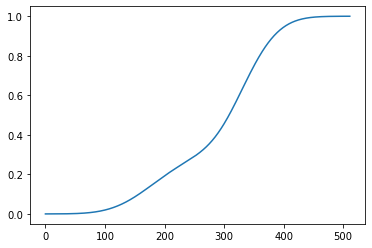

In [5]:
dens = sm.nonparametric.KDEUnivariate(x)
dens.fit()
plt.plot(dens.cdf)
plt.show()

In [11]:
kde = ss.gaussian_kde(x)
ci_low = kde.integrate_box_1d(2, 3)
ci_high = kde.integrate_box_1d(4, 6)
ci_low, ci_high

(0.06912887189384985, 0.35955859037951576)

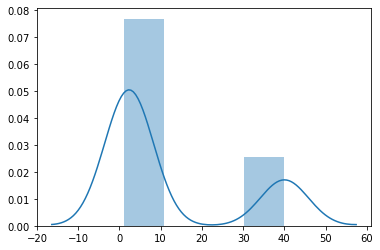

In [93]:
x = [3, 3, 1, 40]
sns.distplot(x);

In [56]:
ecdf = sde.ECDF(x)

In [57]:
iecdf = sde.monotone_fn_inverter(fn=ecdf, x=x)

In [59]:
iecdf(0.01)

ValueError: A value in x_new is below the interpolation range.

In [1]:
ecdf([3, 55, 0.5, 1.5])

array([0.75, 1.  , 0.  , 0.25])

In [82]:
x = [1,3,3,4]
f = lambda x : x**2+5
fi = sde.monotone_fn_inverter(f, x)
df = pd.DataFrame({'x': x, 'y=f(x)': f(np.array(x)), 'fi.x': fi.x, 'fi.y': fi.y})
df

,x,y=f(x),fi.x,fi.y
0,1,6,6,1.0
1,3,14,14,3.0
2,3,14,14,3.0
3,4,21,21,4.0


In [83]:
iecdf = sde.monotone_fn_inverter(ecdf, x)

In [85]:
df = pd.DataFrame({'x': x, 'y=f(x)': ecdf(np.array(x)), 'fi.x': iecdf.x, 'fi.y': iecdf.y})
df

,x,y=f(x),fi.x,fi.y
0,1,0.25,0.25,1.0
1,3,0.75,0.75,3.0
2,3,0.75,0.75,3.0
3,4,1.00,1.00,4.0


In [94]:
x = [3, 3, 1, 40]
ecdf = sde.ECDF(x)
iecdf = sde.monotone_fn_inverter(ecdf, [0.01, 0.05, 0.5, 0.95, 1])
df = pd.DataFrame({'fi.x': iecdf.x, 'fi.y': iecdf.y})
df

,fi.x,fi.y
0,0.00,0.01
1,0.00,0.05
2,0.00,0.50
3,0.00,0.95
4,0.25,1.00


In [95]:
df = pd.DataFrame({'x': ecdf.x, 'y': ecdf.y})
df

,x,y
0,-inf,0.00
1,1.0,0.25
2,3.0,0.50
3,3.0,0.75
4,40.0,1.00


In [102]:
from sklearn.neighbors import KernelDensity
x = [3, 3, 1, 40]
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.  3.  1. 40.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [100]:
log_dens = kde.score_samples(x)

ValueError: Expected 2D array, got 1D array instead:
array=[ 3.  3.  1. 40.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [108]:
from sklearn.neighbors import KernelDensity
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(100)
x

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
        4.30833925,  4.60324647,  4.3128273 ,  4.15479436,  4.32875387,
        4.9873354 ,  3.88268965,  5.2344157 ,  6.65980218,  5.74204416,
        4.80816445,  4.11237104,  4.25284171,  6.6924546 ,  5.05080775,
        4.36300435,  5.19091548,  7.10025514,  5.12015895,  5.61720311,
        5.30017032,  4.64775015,  3.8574818 ,  4.65065728,  4.79110577,
        5.58662319,  5.83898341,  5.93110208,  5.28558733,  5.88514116,
        4.24560206,  6.25286816,  5.51292982,  4.70190716,  5.48851815,
        4.92442829,  6.13162939,  6.51981682,  7.18557541,  3.60

In [109]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

KernelDensity()

(-0.02, 0.22)

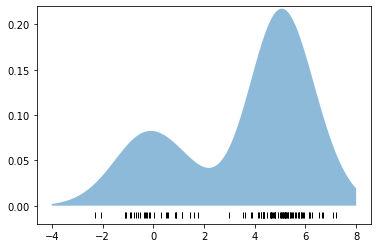

In [114]:
x_d = np.linspace(-4, 8, 1000)
# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [128]:
lp = kde.score_samples(np.array([4.5]).reshape(-1, 1))
np.exp(lp)

array([0.19669624])

## Credits & Links

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html  
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html  